<a target="_blank" href="https://colab.research.google.com/github/mariajosesalasmiranda/Emotion-Vision/blob/main/train_model.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Facial Emotion Recognition:  Classifying Expressions Using Deep Neural Networks

Brief intoriodtion of this projetc

### Install the libraries
The first step is to install all the libraries necessaries.

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

### Check the images
Then we need to dowload the "archieve" folder. This folder need to be download or from the [Kaggle community](https://www.kaggle.com/datasets/msambare/fer2013?select=train), otherwise directly from the GitHub 

In [39]:
img_array = cv2.imread("archive/test/angry/PrivateTest_7833671.jpg")

In [40]:
img_array.shape

(48, 48, 3)

W x H x 3 3 mean 3 channel aka RGB aka REd GREn Blu

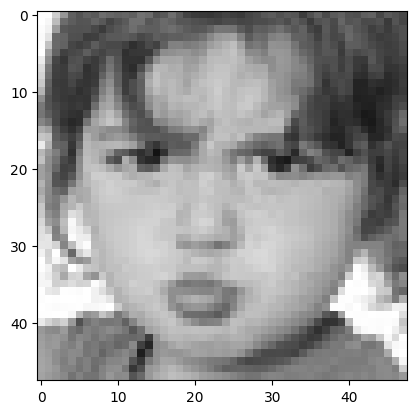

In [41]:
plt.imshow(img_array)

The image is blur because is 48x48

### Prepare the training dataset

In [42]:
Datadirectory = "archive/train/"

In [43]:
Classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

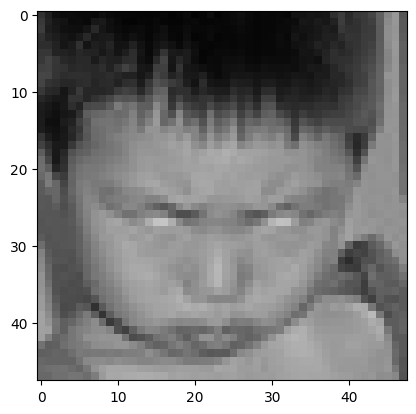

In [48]:
# read the images
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert color space
        plt.imshow(img_array)
        plt.show()
        break
    break

### Reshape the images

### da definire

### Normalise the dataset

### Training your dataset - Transfer Learning

For training our dataset we eill use mobile net... is a .. transferl.

In [7]:
# First we import the libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
# define the pre-trained model. In this case mobileNetV2
model = tf.keras.applications.MobileNetV2()



14536120/14536120 [==============================] - 1s 0us/step


In [9]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

As we can see from the output, MobileNet works with 224, for that we reshape from 48 to 224. 
It has a lot of 3504872 params

### Fine-Tuning the dataset

In [15]:
# check the first layer
base_input = model.layers[0].input
# check the last layer
base_output = model.layers[-2].output

In [16]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

Now i am taking the last layer (global aver) > to another final layer (new layer) > dense 

In [18]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) # because my clsses are 7, Why softax as last? bacause we are classifying

In [19]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_4')>

What i did it? I have remove 'global_average_pooling2d, and and the created layers after  'out_relu[0][0]' 
But i haven't created a model.. 

In [20]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [21]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

Now we can check the output now appears the layers that we have created or the FC

Since my labels are 3, we use entropy
WE compile the model

In [22]:
new_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
new_model.fit(X, Y, epochs=15)

NameError: name 'X' is not defined